# Zimbabwe Water Quality Monitoring Dataset
Data includes rivers, dams, and boreholes commonly monitored in Zimbabwe:
+ Manyame River
+ Mazowe River
+ Save River
+ Gwayi River
+ Umzingwane Dam
+ Tugwi–Mukosi Dam
+ Boreholes (Harare, Bulawayo, Gweru, Mutare)

### The purpose of the analysis
+ This analysis aims to analyse water samples across a number of water sources, 
  to dertemine the quality and safety of water given to communities at large.
+ It characterises water and identifies changes or trends in water quality over time;
+ Identifies specific existing or emerging water quality problems;
+ It gathers information for the design of specific pollution prevention or
   remediation programs;
+ It determines  if compliance with pollution regulation is being met or if
   implementation of effective pollution control action is needed;
### Why monitoring water quality matters
+ Water quality information is important for public safety, environmental protection, and
  economic growth.
+ crucial for water resource management, planning and decision making.
+ Disease prevention 
### Who the stakeholders are:
+ ZINWA
+ EMA
+ local municipalities
+ Communities at large

🏭 2. Business Problem

I am a junior data analyst working for an environmental monitoring agency.

My tasks:

+ Assess water quality across Zimbabwe

+ Identify pollution hotspots

+ Compare rivers vs dams vs boreholes

+ Detect outliers or dangerous samples

+ Provide actionable insights for water safety management

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [84]:
import os

if not os.path.exists("images"):
    os.makedirs("images")


In [3]:
# 📂 3. Load & Explore Data

# Tasks:

# Load dataset
df = pd.read_csv("Week1_B_Zimbabwe_Water_Quality.csv")
# Show column names
df.info()
# Show dataset shape
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   site_id               400 non-null    object 
 1   region                400 non-null    object 
 2   water_source          400 non-null    object 
 3   pH                    400 non-null    float64
 4   turbidity_ntu         400 non-null    float64
 5   dissolved_oxygen_mgL  400 non-null    float64
 6   nitrates_mgL          400 non-null    float64
 7   ec_uscm               400 non-null    float64
 8   sampling_date         400 non-null    object 
dtypes: float64(5), object(4)
memory usage: 28.3+ KB


(400, 9)

In [4]:
# Display first 10 rows
df.head(10)

,site_id,region,water_source,pH,turbidity_ntu,dissolved_oxygen_mgL,nitrates_mgL,ec_uscm,sampling_date
0,W0001,Masvingo,Umzingwane Dam,8.61,99.59,9.31,16.50,672.31,2025-01-01
1,W0002,Mashonaland East,Manyame River,5.83,110.94,3.56,11.66,438.28,2025-01-02
2,W0003,Matabeleland North,Harare Borehole,7.48,78.51,4.35,4.91,1194.28,2025-01-03
3,W0004,Mashonaland West,Umzingwane Dam,6.36,64.60,11.63,8.21,881.36,2025-01-04
4,W0005,Masvingo,Tugwi-Mukosi Dam,6.77,131.62,4.55,27.85,1005.30,2025-01-05
5,W0006,Midlands,Harare Borehole,7.25,63.21,8.62,20.28,415.85,2025-01-06
6,W0007,Mashonaland Central,Save River,6.81,69.83,11.79,14.88,369.33,2025-01-07
7,W0008,Masvingo,Mutare Borehole,7.90,148.56,5.74,0.38,758.14,2025-01-08
8,W0009,Matabeleland North,Save River,7.27,1.04,2.18,29.77,1119.47,2025-01-09
9,W0010,Mashonaland West,Umzingwane Dam,7.66,28.64,4.44,20.14,811.60,2025-01-10


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pH,400.0,7.435475,1.021627,5.51,6.6600,7.480,8.2825,9.20
turbidity_ntu,400.0,74.625200,43.750901,1.04,36.0900,75.360,111.7950,149.45
dissolved_oxygen_mgL,400.0,6.947200,2.820553,2.00,4.4550,6.995,9.4625,11.95
nitrates_mgL,400.0,14.842525,8.827323,0.01,6.7775,14.990,22.4825,29.91
ec_uscm,400.0,778.151850,421.954248,53.05,413.8925,803.770,1139.0100,1499.59


In [6]:
# List unique regions
unique_regions = df["region"].unique()
unique_regions

array(['Masvingo', 'Mashonaland East', 'Matabeleland North',
       'Mashonaland West', 'Midlands', 'Mashonaland Central',
       'Manicaland', 'Bulawayo', 'Harare', 'Matabeleland South'],
      dtype=object)

In [7]:
# List unique water sources
unique_water_sources = df["water_source"].unique()
unique_water_sources

array(['Umzingwane Dam', 'Manyame River', 'Harare Borehole',
       'Tugwi-Mukosi Dam', 'Save River', 'Mutare Borehole',
       'Gweru Borehole', 'Gwayi River', 'Mazowe River',
       'Bulawayo Borehole'], dtype=object)

In [8]:
df["region"].value_counts().rename_axis("region").reset_index(name = "count"), df["water_source"].value_counts().rename_axis("water_source").reset_index(name = "count")

(                region  count
 0               Harare     49
 1  Mashonaland Central     45
 2             Masvingo     44
 3   Matabeleland North     43
 4             Midlands     39
 5     Mashonaland East     38
 6   Matabeleland South     38
 7           Manicaland     36
 8     Mashonaland West     35
 9             Bulawayo     33,
         water_source  count
 0     Umzingwane Dam     52
 1    Mutare Borehole     50
 2      Manyame River     48
 3         Save River     45
 4     Gweru Borehole     37
 5    Harare Borehole     36
 6       Mazowe River     35
 7   Tugwi-Mukosi Dam     34
 8        Gwayi River     32
 9  Bulawayo Borehole     31)

In [9]:
def ph_category(ph):
    if pd.isna(ph):
        return 'unknown'
    if ph < 6.5:
        return 'acidic'
    if ph <= 7.5:
        return 'neutral'
    else:
        return 'basic'

df['ph_category'] = df['pH'].apply(ph_category)
df['ph_category'].value_counts().rename_axis('ph_categroy').reset_index(name = 'count')
summary = df.groupby(["region", "ph_category", "water_source"]).size().rename_axis(["region","ph_category","water_source"]).reset_index(name = 'count')
summary.head(10)

,region,ph_category,water_source,count
0,Bulawayo,acidic,Gwayi River,2
1,Bulawayo,acidic,Gweru Borehole,1
2,Bulawayo,acidic,Manyame River,1
3,Bulawayo,acidic,Mutare Borehole,1
4,Bulawayo,acidic,Save River,2
5,Bulawayo,acidic,Umzingwane Dam,2
6,Bulawayo,basic,Gweru Borehole,1
7,Bulawayo,basic,Manyame River,3
8,Bulawayo,basic,Mazowe River,1
9,Bulawayo,basic,Mutare Borehole,3


In [10]:
plot_data = summary.pivot_table(index = "region", columns = "ph_category", values = "count",aggfunc="sum").fillna(0)
plot_data.head(10)

ph_category,acidic,basic,neutral
region,,,
Bulawayo,9,15,9
Harare,9,25,15
Manicaland,9,19,8
Mashonaland Central,14,16,15
Mashonaland East,11,15,12
Mashonaland West,9,14,12
Masvingo,10,23,11
Matabeleland North,7,27,9
Matabeleland South,6,19,13


In [11]:
plot_data_1 = summary.pivot_table(index = "water_source", columns = "ph_category", values = "count",aggfunc="sum").fillna(0)
plot_data_1.head(10)

ph_category,acidic,basic,neutral
water_source,,,
Bulawayo Borehole,5,17,9
Gwayi River,8,13,11
Gweru Borehole,6,15,16
Harare Borehole,8,15,13
Manyame River,8,29,11
Mazowe River,10,14,11
Mutare Borehole,11,24,15
Save River,15,21,9
Tugwi-Mukosi Dam,5,19,10


In [12]:
def tb_category(tb_ntu):
    if pd.isna(tb_ntu):
        return "unknown"
    if tb_ntu <= 5:
        return "Low Clear"
    if 5 <  tb_ntu <= 50:
        return "normal"
    else:
        return "unsafe"

df["tb_category"] = df["turbidity_ntu"].apply(tb_category)
df["tb_category"].value_counts().rename_axis("tb_categroy").reset_index(name = "count")
tb_summary = df.groupby(["region", "tb_category", "water_source"]).size().rename_axis(["region","tb_category","water_source"]).reset_index(name = 'count')
tb_summary.head(10)

,region,tb_category,water_source,count
0,Bulawayo,normal,Bulawayo Borehole,1
1,Bulawayo,normal,Harare Borehole,1
2,Bulawayo,normal,Manyame River,2
3,Bulawayo,normal,Mutare Borehole,3
4,Bulawayo,normal,Save River,3
5,Bulawayo,normal,Tugwi-Mukosi Dam,1
6,Bulawayo,normal,Umzingwane Dam,1
7,Bulawayo,unsafe,Gwayi River,2
8,Bulawayo,unsafe,Gweru Borehole,4
9,Bulawayo,unsafe,Harare Borehole,1


In [13]:
plot_data_3 = tb_summary.pivot_table(index = "region", columns = "tb_category", values = "count",aggfunc="sum").fillna(0)
plot_data_3.head(10)

tb_category,Low Clear,normal,unsafe
region,,,
Bulawayo,0.0,12.0,21.0
Harare,4.0,14.0,31.0
Manicaland,2.0,9.0,25.0
Mashonaland Central,2.0,13.0,30.0
Mashonaland East,1.0,14.0,23.0
Mashonaland West,1.0,11.0,23.0
Masvingo,1.0,14.0,29.0
Matabeleland North,1.0,8.0,34.0
Matabeleland South,2.0,8.0,28.0


In [71]:
plot_data_4 = tb_summary.pivot_table(index = "water_source", columns = "tb_category", values = "count",aggfunc="sum").fillna(0)
plot_data_4.head(10)

tb_category,Low Clear,normal,unsafe
water_source,,,
Bulawayo Borehole,0.0,10.0,21.0
Gwayi River,0.0,8.0,24.0
Gweru Borehole,1.0,11.0,25.0
Harare Borehole,0.0,10.0,26.0
Manyame River,1.0,17.0,30.0
Mazowe River,1.0,8.0,26.0
Mutare Borehole,3.0,17.0,30.0
Save River,6.0,14.0,25.0
Tugwi-Mukosi Dam,0.0,6.0,28.0


In [73]:
def dissolved_oxygen(D_O):
    if pd.isna(D_O):
        return "unknown"
    if D_O <= 5:
        return "Low (poor)"
    if 5 <  D_O <= 9:
        return "normal(healthy)"
    else:
        return "very Good"

df["dissolved_oxygen"] = df["dissolved_oxygen_mgL"].apply(dissolved_oxygen)
df["dissolved_oxygen"].value_counts().rename_axis("dissolved_oxyegen").reset_index(name = "count")
D_O_summary = df.groupby(["region", "dissolved_oxygen", "water_source"]).size().rename_axis(["region","dissolved_oxygen","water_source"]).reset_index(name = 'count')
D_O_summary.head(10)

,region,dissolved_oxygen,water_source,count
0,Bulawayo,Low (poor),Gweru Borehole,1
1,Bulawayo,Low (poor),Harare Borehole,1
2,Bulawayo,Low (poor),Manyame River,3
3,Bulawayo,Low (poor),Mutare Borehole,1
4,Bulawayo,Low (poor),Tugwi-Mukosi Dam,3
5,Bulawayo,Low (poor),Umzingwane Dam,3
6,Bulawayo,normal(healthy),Gwayi River,1
7,Bulawayo,normal(healthy),Gweru Borehole,2
8,Bulawayo,normal(healthy),Harare Borehole,1
9,Bulawayo,normal(healthy),Mazowe River,2


In [74]:
plot_data_5 = D_O_summary.pivot_table(index = "region", columns = "dissolved_oxygen", values = "count",aggfunc="sum").fillna(0)
plot_data_5.head(10)

dissolved_oxygen,Low (poor),normal(healthy),very Good
region,,,
Bulawayo,12,11,10
Harare,16,25,8
Manicaland,9,16,11
Mashonaland Central,11,18,16
Mashonaland East,8,20,10
Mashonaland West,8,17,10
Masvingo,14,17,13
Matabeleland North,12,18,13
Matabeleland South,17,12,9


In [75]:
plot_data_6 = D_O_summary.pivot_table(index = "water_source", columns = "dissolved_oxygen", values = "count",aggfunc="sum").fillna(0)
plot_data_6.head(10)

dissolved_oxygen,Low (poor),normal(healthy),very Good
water_source,,,
Bulawayo Borehole,14,11,6
Gwayi River,8,15,9
Gweru Borehole,9,17,11
Harare Borehole,13,12,11
Manyame River,14,21,13
Mazowe River,13,16,6
Mutare Borehole,16,21,13
Save River,8,26,11
Tugwi-Mukosi Dam,11,10,13


In [77]:
def nitrates(NO3):
    if pd.isna(NO3):
        return "unknown"
    if NO3 <= 3:
        return "Low (safe)"
    if 3 <  NO3 <= 10:
        return "normal(acceptable)"
    else:
        return "unsafe"

df["nitrates"] = df["nitrates_mgL"].apply(nitrates)
df["nitrates"].value_counts().rename_axis("nitrates").reset_index(name = "count")
D_O_summary = df.groupby(["region", "nitrates", "water_source"]).size().rename_axis(["region","nitrates","water_source"]).reset_index(name = 'count')
D_O_summary.head(10)

,region,nitrates,water_source,count
0,Bulawayo,Low (safe),Harare Borehole,1
1,Bulawayo,Low (safe),Manyame River,1
2,Bulawayo,Low (safe),Save River,1
3,Bulawayo,normal(acceptable),Gwayi River,1
4,Bulawayo,normal(acceptable),Harare Borehole,1
5,Bulawayo,normal(acceptable),Manyame River,1
6,Bulawayo,normal(acceptable),Tugwi-Mukosi Dam,1
7,Bulawayo,normal(acceptable),Umzingwane Dam,1
8,Bulawayo,unsafe,Bulawayo Borehole,1
9,Bulawayo,unsafe,Gwayi River,1


In [78]:
plot_data_7 = D_O_summary.pivot_table(index = "region", columns = "nitrates", values = "count",aggfunc="sum").fillna(0)
plot_data_7.head(10)

nitrates,Low (safe),normal(acceptable),unsafe
region,,,
Bulawayo,3,5,25
Harare,6,14,29
Manicaland,3,8,25
Mashonaland Central,5,12,28
Mashonaland East,6,9,23
Mashonaland West,3,7,25
Masvingo,5,9,30
Matabeleland North,1,14,28
Matabeleland South,5,10,23


In [79]:
plot_data_8 = D_O_summary.pivot_table(index = "water_source", columns = "nitrates", values = "count",aggfunc="sum").fillna(0)
plot_data_8.head(10)

nitrates,Low (safe),normal(acceptable),unsafe
water_source,,,
Bulawayo Borehole,2,5,24
Gwayi River,6,13,13
Gweru Borehole,5,6,26
Harare Borehole,8,7,21
Manyame River,5,15,28
Mazowe River,2,12,21
Mutare Borehole,3,8,39
Save River,5,8,32
Tugwi-Mukosi Dam,3,8,23


In [80]:
def Electric_Cond(ec):
    if pd.isna(ec):
        return "unknown"
    if ec <= 300:
        return "Low (fresh)"
    if 300 <  ec <= 1000:
        return "normal(acceptable)"
    else:
        return "unsafe"

df["electric_cond"] = df["ec_uscm"].apply(Electric_Cond)
df["electric_cond"].value_counts().rename_axis("electric_cond").reset_index(name = "count")
D_O_summary = df.groupby(["region", "electric_cond", "water_source"]).size().rename_axis(["region","electric_cond","water_source"]).reset_index(name = 'count')
D_O_summary.tail(10)

,region,electric_cond,water_source,count
210,Midlands,normal(acceptable),Tugwi-Mukosi Dam,3
211,Midlands,normal(acceptable),Umzingwane Dam,2
212,Midlands,unsafe,Gwayi River,1
213,Midlands,unsafe,Harare Borehole,1
214,Midlands,unsafe,Manyame River,2
215,Midlands,unsafe,Mazowe River,1
216,Midlands,unsafe,Mutare Borehole,3
217,Midlands,unsafe,Save River,2
218,Midlands,unsafe,Tugwi-Mukosi Dam,2
219,Midlands,unsafe,Umzingwane Dam,3


In [81]:
plot_data_9 = D_O_summary.pivot_table(index = "water_source", columns = "electric_cond", values = "count",aggfunc="sum").fillna(0)
plot_data_9.head(10)

electric_cond,Low (fresh),normal(acceptable),unsafe
water_source,,,
Bulawayo Borehole,9,16,6
Gwayi River,5,15,12
Gweru Borehole,5,20,12
Harare Borehole,12,10,14
Manyame River,10,22,16
Mazowe River,3,21,11
Mutare Borehole,9,19,22
Save River,9,20,16
Tugwi-Mukosi Dam,5,16,13


In [ ]:
📊 4. Summary Statistics

Tasks:

Compute descriptive statistics for

dissolved oxygen

nitrates

EC (conductivity)

Which variable has the highest variation?

Are any values unrealistic?

In [23]:
unsafe_mask = (
    (df["pH"] < 6.5) | (df["pH"] > 8.5) |
    (df["turbidity_ntu"] > 50) |
    (df["dissolved_oxygen_mgL"] < 5) |
    (df["nitrates_mgL"] > 10) |
    (df["ec_uscm"] > 1000)
)

df["Water_Status"] = np.where(unsafe_mask, "UNSAFE", "SAFE")
df.tail(10)

,site_id,region,water_source,pH,turbidity_ntu,dissolved_oxygen_mgL,nitrates_mgL,ec_uscm,sampling_date,ph_category,tb_category,dissolved_oxygen,nitrates,electric_cond,Water_Status
390,W0391,Matabeleland South,Mutare Borehole,6.85,78.74,6.86,1.93,1029.98,2026-01-26,neutral,unsafe,normal(healthy),Low (safe),unsafe,UNSAFE
391,W0392,Mashonaland West,Tugwi-Mukosi Dam,7.57,52.06,11.20,26.32,251.72,2026-01-27,basic,unsafe,very Good,unsafe,Low (fresh),UNSAFE
392,W0393,Harare,Save River,7.28,80.30,7.21,26.32,418.64,2026-01-28,neutral,unsafe,normal(healthy),unsafe,normal(acceptable),UNSAFE
393,W0394,Midlands,Save River,8.77,19.74,8.16,9.91,1319.49,2026-01-29,basic,normal,normal(healthy),normal(acceptable),unsafe,UNSAFE
394,W0395,Midlands,Gweru Borehole,7.46,20.77,3.57,10.21,315.07,2026-01-30,neutral,normal,Low (poor),unsafe,normal(acceptable),UNSAFE
395,W0396,Harare,Harare Borehole,7.13,22.39,2.44,29.67,453.74,2026-01-31,neutral,normal,Low (poor),unsafe,normal(acceptable),UNSAFE
396,W0397,Bulawayo,Umzingwane Dam,7.00,141.03,3.11,18.79,237.92,2026-02-01,neutral,unsafe,Low (poor),unsafe,Low (fresh),UNSAFE
397,W0398,Manicaland,Mutare Borehole,7.62,110.20,7.99,15.94,1030.36,2026-02-02,basic,unsafe,normal(healthy),unsafe,unsafe,UNSAFE
398,W0399,Matabeleland South,Harare Borehole,8.47,25.19,2.95,25.14,1418.77,2026-02-03,basic,normal,Low (poor),unsafe,unsafe,UNSAFE
399,W0400,Matabeleland North,Gweru Borehole,7.49,29.06,5.76,8.56,440.00,2026-02-04,neutral,normal,normal(healthy),normal(acceptable),normal(acceptable),SAFE


In [24]:
region_status = df.pivot_table(
    index="region",
    columns="Water_Status",
    values="site_id",
    aggfunc="count",
    fill_value=0
)
region_status


Water_Status,SAFE,UNSAFE
region,,
Bulawayo,2,31
Harare,4,45
Manicaland,0,36
Mashonaland Central,0,45
Mashonaland East,2,36
Mashonaland West,1,34
Masvingo,0,44
Matabeleland North,2,41
Matabeleland South,0,38


In [25]:
source_status = df.pivot_table(
    index="water_source",
    columns="Water_Status",
    values="site_id",
    aggfunc="count",
    fill_value=0
)
source_status


Water_Status,SAFE,UNSAFE
water_source,,
Bulawayo Borehole,0,31
Gwayi River,1,31
Gweru Borehole,2,35
Harare Borehole,2,34
Manyame River,3,45
Mazowe River,0,35
Mutare Borehole,0,50
Save River,1,44
Tugwi-Mukosi Dam,1,33


In [ ]:
🚨 5. Water Quality Threshold Rules

Create threshold categories:

UNSAFE samples if:

pH < 6.5 or pH > 8.5

Turbidity > 50 NTU

Dissolved oxygen < 5 mg/L

Nitrates > 10 mg/L

EC > 1000 µS/cm

Tasks:

Create a new column: Water_Status (“SAFE” or “UNSAFE”)

Count total unsafe samples

Compute % unsafe

Identify which variable fails most often

In [26]:
df.head()

,site_id,region,water_source,pH,turbidity_ntu,dissolved_oxygen_mgL,nitrates_mgL,ec_uscm,sampling_date,ph_category,tb_category,dissolved_oxygen,nitrates,electric_cond,Water_Status
0,W0001,Masvingo,Umzingwane Dam,8.61,99.59,9.31,16.50,672.31,2025-01-01,basic,unsafe,very Good,unsafe,normal(acceptable),UNSAFE
1,W0002,Mashonaland East,Manyame River,5.83,110.94,3.56,11.66,438.28,2025-01-02,acidic,unsafe,Low (poor),unsafe,normal(acceptable),UNSAFE
2,W0003,Matabeleland North,Harare Borehole,7.48,78.51,4.35,4.91,1194.28,2025-01-03,neutral,unsafe,Low (poor),normal(acceptable),unsafe,UNSAFE
3,W0004,Mashonaland West,Umzingwane Dam,6.36,64.60,11.63,8.21,881.36,2025-01-04,acidic,unsafe,very Good,normal(acceptable),normal(acceptable),UNSAFE
4,W0005,Masvingo,Tugwi-Mukosi Dam,6.77,131.62,4.55,27.85,1005.30,2025-01-05,neutral,unsafe,Low (poor),unsafe,unsafe,UNSAFE


In [ ]:
🌍 6. Geographic Analysis (by region)

Tasks:

Count unsafe samples per region

Compute unsafe percentage per region

Identify top 3 most polluted regions

Identify top 3 cleanest regions

In [27]:
unsafe_per_region = df[df["Water_Status"] == "UNSAFE"]["region"].value_counts()
unsafe_per_region


region
Mashonaland Central    45
Harare                 45
Masvingo               44
Matabeleland North     41
Midlands               39
Matabeleland South     38
Mashonaland East       36
Manicaland             36
Mashonaland West       34
Bulawayo               31
Name: count, dtype: int64

In [28]:
safe_per_region = df[df["Water_Status"] == "SAFE"]["region"].value_counts()
safe_per_region


region
Harare                4
Matabeleland North    2
Bulawayo              2
Mashonaland East      2
Mashonaland West      1
Name: count, dtype: int64

In [29]:
percentage_unsafe_region = (
    df.groupby("region")["Water_Status"]
      .apply(lambda x: (x == "UNSAFE").mean() * 100)
      .round(2)
)

percentage_unsafe_region


region
Bulawayo                93.94
Harare                  91.84
Manicaland             100.00
Mashonaland Central    100.00
Mashonaland East        94.74
Mashonaland West        97.14
Masvingo               100.00
Matabeleland North      95.35
Matabeleland South     100.00
Midlands               100.00
Name: Water_Status, dtype: float64

In [31]:
percentage_safe_region = (
    df.groupby("region")["Water_Status"]
      .apply(lambda x: (x == "SAFE").mean() * 100)
      .round(2)
)

percentage_safe_region

region
Bulawayo               6.06
Harare                 8.16
Manicaland             0.00
Mashonaland Central    0.00
Mashonaland East       5.26
Mashonaland West       2.86
Masvingo               0.00
Matabeleland North     4.65
Matabeleland South     0.00
Midlands               0.00
Name: Water_Status, dtype: float64

In [30]:
top_3_polluted = percentage_unsafe_region.sort_values(ascending=False).head(3)
top_3_polluted



region
Manicaland             100.0
Mashonaland Central    100.0
Masvingo               100.0
Name: Water_Status, dtype: float64

In [32]:
top_3_unpolluted = percentage_safe_region.sort_values(ascending=False).head(3)
top_3_unpolluted

region
Harare              8.16
Bulawayo            6.06
Mashonaland East    5.26
Name: Water_Status, dtype: float64

In [33]:
def classify_source(ws):
    if "River" in ws:
        return "River"
    if "Dam" in ws:
        return "Dam"
    if "Borehole" in ws:
        return "Borehole"
    return "Other"

df["source_type"] = df["water_source"].apply(classify_source)
df["source_type"].value_counts()


source_type
River       160
Borehole    154
Dam          86
Name: count, dtype: int64

In [34]:
pollution_rate_source_type = (
    df.groupby("source_type")["Water_Status"]
      .apply(lambda x: (x == "UNSAFE").mean() * 100)
      .round(2)
)

pollution_rate_source_type


source_type
Borehole    97.40
Dam         97.67
River       96.88
Name: Water_Status, dtype: float64

In [35]:
highest_pollution_source = pollution_rate_source_type.sort_values(ascending=False).head(1)
highest_pollution_source


source_type
Dam    97.67
Name: Water_Status, dtype: float64

In [36]:
source_status = df.pivot_table(
    index="source_type",
    columns="Water_Status",
    values="site_id",
    aggfunc="count",
    fill_value=0
)

source_status


Water_Status,SAFE,UNSAFE
source_type,,
Borehole,4,150
Dam,2,84
River,5,155


# Visualizations

### Bar Chart — Unsafe Samples per Region

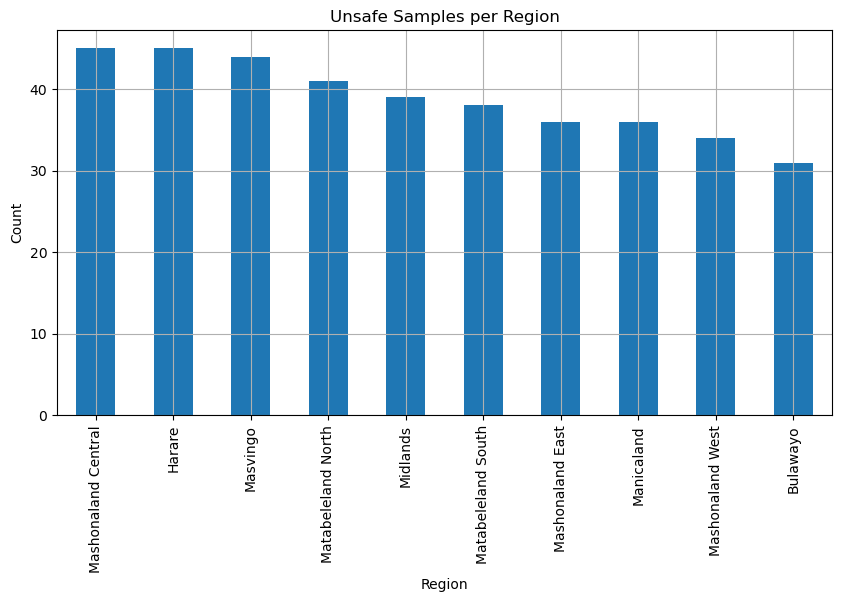

In [96]:
unsafe_per_region.plot(kind="bar", figsize=(10,5))
plt.title("Unsafe Samples per Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.grid(True)
plt.savefig("images/unsafe_samples_region.png", dpi=300, bbox_inches='tight')
plt.show()


### Bar Chart — Percentage Unsafe per Region

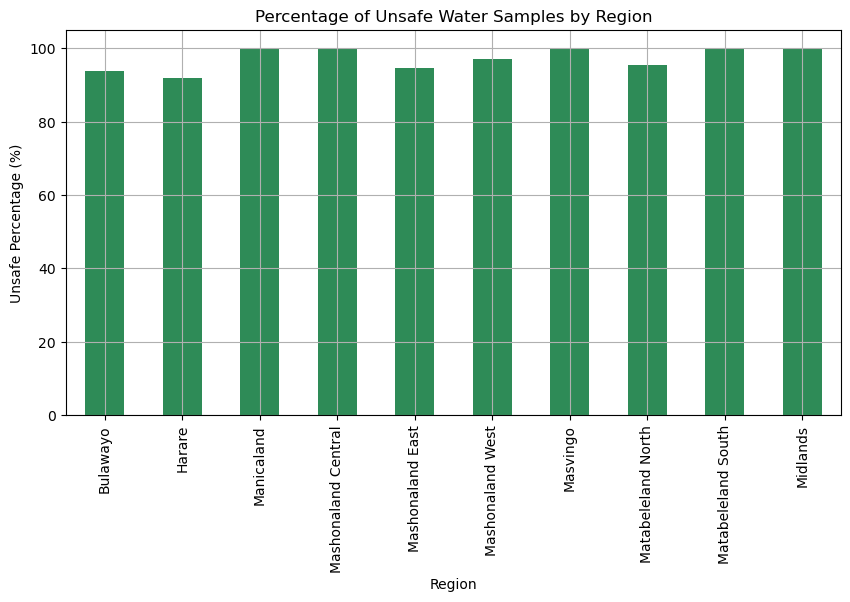

In [91]:
percentage_unsafe_region.plot(kind="bar", figsize=(10,5), color = "seagreen")
plt.title("Percentage of Unsafe Water Samples by Region")
plt.xlabel("Region")
plt.ylabel("Unsafe Percentage (%)")
plt.grid(True)
plt.savefig("images/percentage_unsafe_per_region.png", dpi=300, bbox_inches='tight')
plt.show()


### Bar Chart — Pollution Rate by Source Type (Rivers vs Dams vs Boreholes)

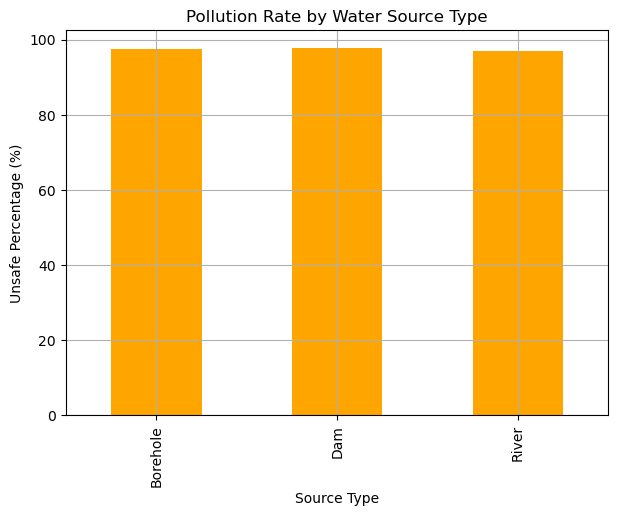

In [92]:
pollution_rate_source_type.plot(kind="bar", figsize=(7,5), color = "orange")
plt.title("Pollution Rate by Water Source Type")
plt.xlabel("Source Type")
plt.ylabel("Unsafe Percentage (%)")
plt.grid(True)
plt.savefig("images/pollution_rate_by_source.png", dpi=300, bbox_inches='tight')
plt.show()


### Bar Chart — safe vs Unsafe by water source

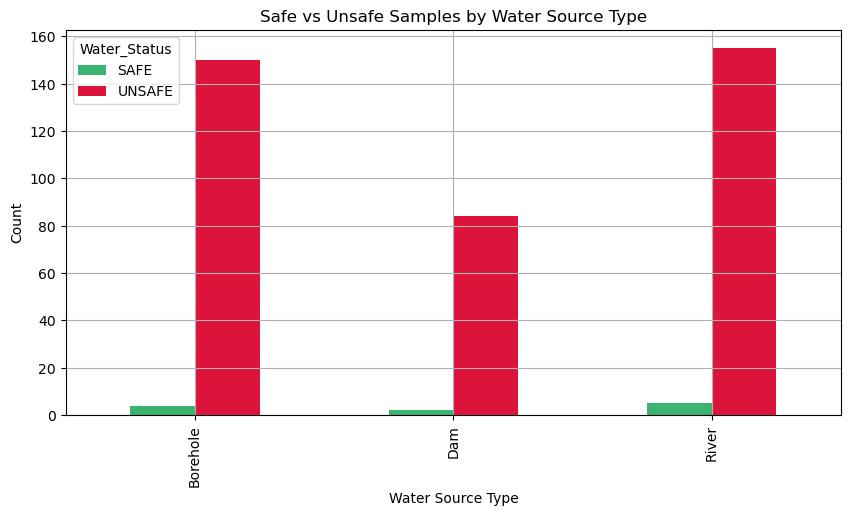

In [93]:
source_status.plot(
    kind="bar", 
    figsize=(10,5), 
    color=["mediumseagreen", "crimson"]  # SAFE = green, UNSAFE = red
)
plt.title("Safe vs Unsafe Samples by Water Source Type")
plt.xlabel("Water Source Type")
plt.ylabel("Count")
plt.grid(True)
plt.savefig("images/safe_vs_unsafe_by_water_source.png", dpi=300, bbox_inches='tight')
plt.show()


### Bar Chart — Pollution Rate by Source Type (Rivers vs Dams vs Boreholes)

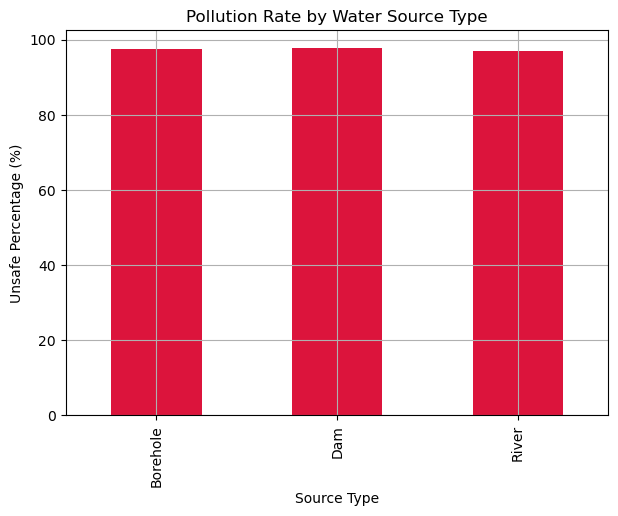

In [94]:
pollution_rate_source_type.plot(kind="bar", figsize=(7,5),color= "crimson")
plt.title("Pollution Rate by Water Source Type")
plt.xlabel("Source Type")
plt.ylabel("Unsafe Percentage (%)")
plt.grid(True)
plt.savefig("images/pollution_rate_by_source_type.png", dpi=300, bbox_inches='tight')
plt.show()


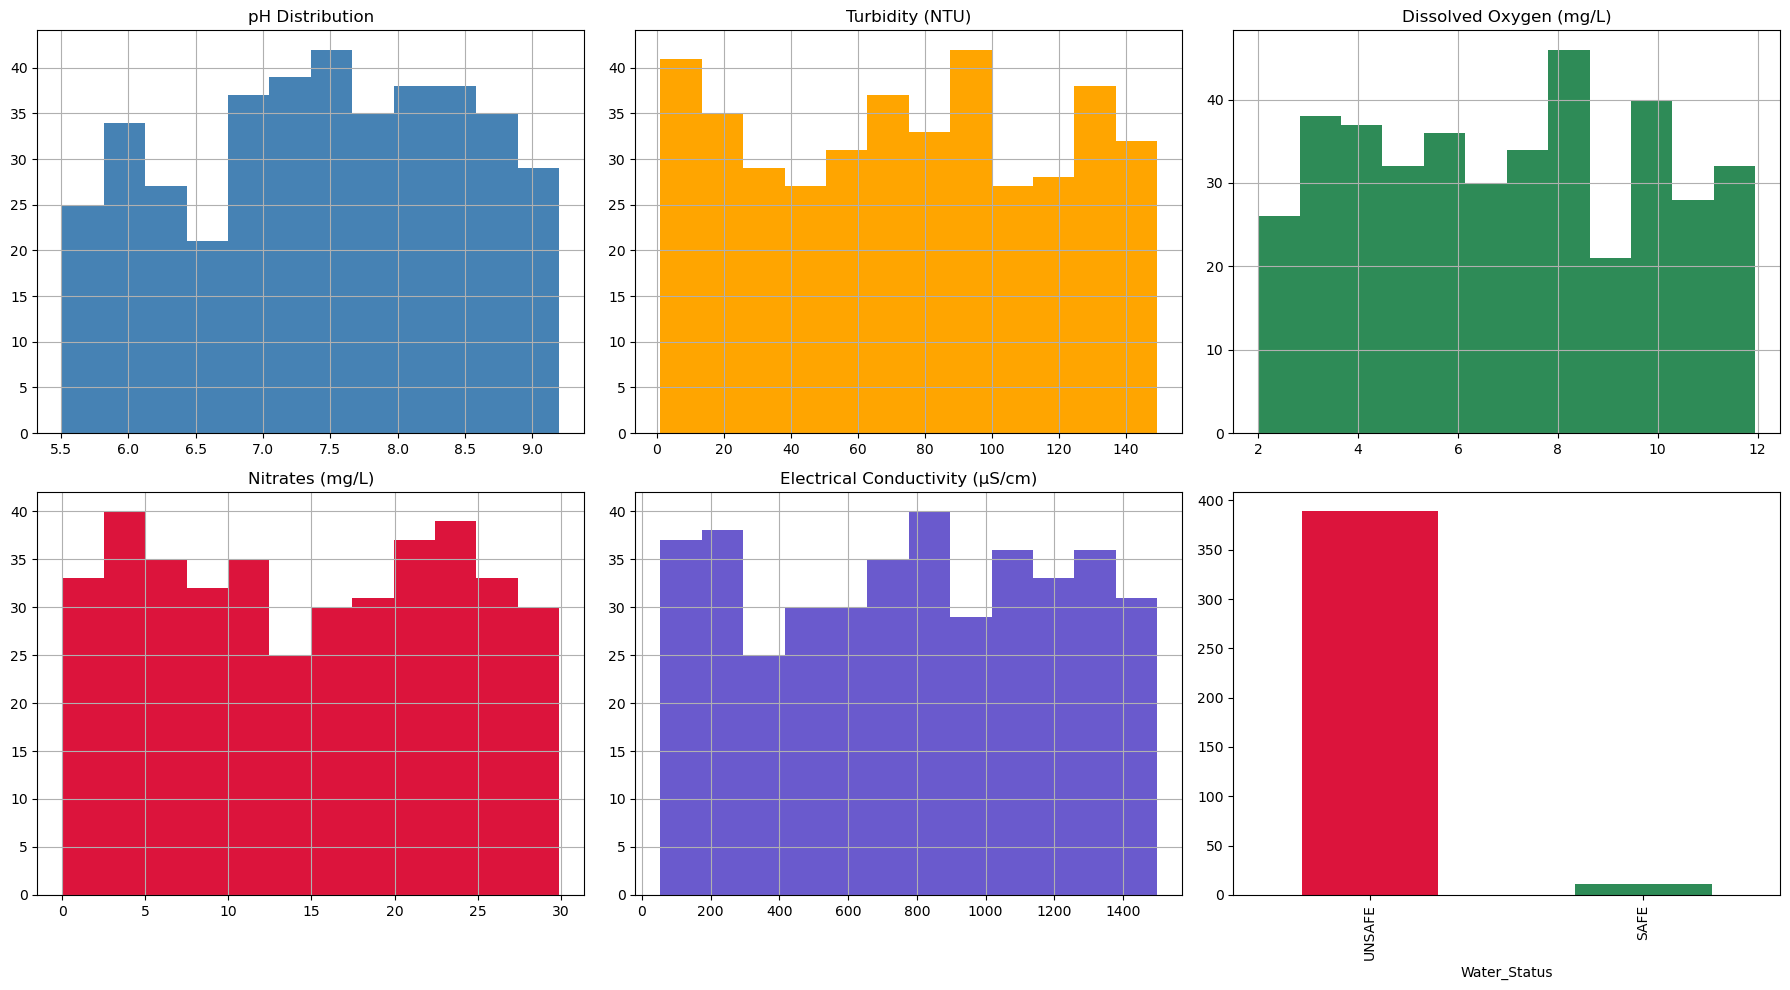

In [95]:

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Flatten axes to loop easily
axes = axes.flatten()

columns = [
    "pH",
    "turbidity_ntu",
    "dissolved_oxygen_mgL",
    "nitrates_mgL",
    "ec_uscm",
    "Water_Status"
]

titles = [
    "pH Distribution",
    "Turbidity (NTU)",
    "Dissolved Oxygen (mg/L)",
    "Nitrates (mg/L)",
    "Electrical Conductivity (µS/cm)",
    "Safe vs Unsafe"
]

colors = [
    "steelblue",
    "orange",
    "seagreen",
    "crimson",
    "slateblue",
    "purple"
]

for ax, col, title, color in zip(axes, columns, titles, colors):
    if col == "Water_Status":
        df[col].value_counts().plot(
            kind="bar",
            ax=ax,
            color=["crimson", "seagreen"]     # SAFE = green, UNSAFE = red
    )
    else:
        ax.hist(df[col], bins=12, color=color)
    
        ax.set_title(title)
        ax.grid(True)

plt.tight_layout()
plt.savefig("images/water_properties.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
🔎 9. Outlier Detection

Define outliers using:

pH < 5.8 or > 9.0

turbidity > 120 NTU

nitrates > 25 mg/L

EC > 1400

Tasks:

Extract all outliers

Count outliers per region

Count outliers per water source

Identify top 5 most extreme samples

In [61]:
#Finding outliers
cond_pH = (df["pH"] < 5.8 )|( df["pH"] > 9)
cond_turbidity = df["turbidity_ntu"] >120
cond_nitrates = df["nitrates_mgL"] > 25
cond_EC = df["ec_uscm"] >1400
outliers= df[cond_pH| cond_turbidity|cond_nitrates|cond_EC]
outliers.head()

,site_id,region,water_source,pH,turbidity_ntu,dissolved_oxygen_mgL,nitrates_mgL,ec_uscm,sampling_date,ph_category,tb_category,dissolved_oxygen,nitrates,electric_cond,Water_Status,source_type
4,W0005,Masvingo,Tugwi-Mukosi Dam,6.77,131.62,4.55,27.85,1005.30,2025-01-05,neutral,unsafe,Low (poor),unsafe,unsafe,UNSAFE,Dam
7,W0008,Masvingo,Mutare Borehole,7.90,148.56,5.74,0.38,758.14,2025-01-08,basic,unsafe,normal(healthy),Low (safe),normal(acceptable),UNSAFE,Borehole
8,W0009,Matabeleland North,Save River,7.27,1.04,2.18,29.77,1119.47,2025-01-09,neutral,Low Clear,Low (poor),unsafe,unsafe,UNSAFE,River
11,W0012,Matabeleland North,Gweru Borehole,7.56,139.96,10.65,26.38,1309.40,2025-01-12,basic,unsafe,very Good,unsafe,unsafe,UNSAFE,Borehole
13,W0014,Mashonaland Central,Manyame River,7.59,2.41,3.13,16.32,1435.95,2025-01-14,basic,Low Clear,Low (poor),unsafe,unsafe,UNSAFE,River


In [63]:
outliers_by_region_ws = outliers["region"].value_counts()
outliers_by_region_ws

region
Masvingo               25
Matabeleland North     22
Harare                 22
Mashonaland East       17
Mashonaland West       17
Mashonaland Central    15
Matabeleland South     15
Midlands               14
Bulawayo               12
Manicaland             12
Name: count, dtype: int64

In [64]:
outliers_by_water_source = outliers["water_source"].value_counts()
outliers_by_water_source

water_source
Umzingwane Dam       25
Save River           21
Manyame River        21
Mutare Borehole      19
Mazowe River         19
Tugwi-Mukosi Dam     18
Gweru Borehole       14
Harare Borehole      14
Gwayi River          10
Bulawayo Borehole    10
Name: count, dtype: int64

In [69]:
outliers_region = (
    outliers.groupby(["region", "water_source"])
            .size()
            .reset_index(name="outlier_count")
)
outliers_region


,region,water_source,outlier_count
0,Bulawayo,Gwayi River,1
1,Bulawayo,Gweru Borehole,1
2,Bulawayo,Harare Borehole,1
3,Bulawayo,Manyame River,1
4,Bulawayo,Mazowe River,2
...,...,...,...
79,Midlands,Manyame River,1
80,Midlands,Mazowe River,1
81,Midlands,Mutare Borehole,3
82,Midlands,Save River,2


In [82]:

region_status.to_csv("region_status.csv", index=True)
source_status.to_csv("water_source_status.csv", index=True)
percentage_unsafe_region.to_csv("percentage_unsafe_region.csv", index=True)
pollution_rate_source_type.to_csv("source_type_pollution_rate.csv", index=True)
outliers_region.to_csv("outliers_per_region.csv", index=True)
outliers_by_water_source.to_csv("outliers_per_water_source.csv", index=True)
outliers_region.to_csv("outliers_region_source_pivot.csv", index=False)

df.to_csv("cleaned_water_dataset.csv", index=False)
outliers.to_csv("outliers.csv", index=False)
